In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive"

'bandicam 2024-10-19 23-59-13-798.zip'	'mahir cs2001030.zip'
'Colab Notebooks'			 monkey
'Data science'				 monkey.ipynb
'dataset sample pic.gdraw'		 nlp_no
'Getting started.pdf'			 projectXai.ipynb
 KDDTest-21.txt				'Untitled drawing (1).gdraw'
 KDDTest+.txt				'Untitled drawing (2).gdraw'
 KDDTrain+_20Percent.txt		'Untitled drawing.gdraw'
 KDDTrain+.txt


In [3]:
#Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

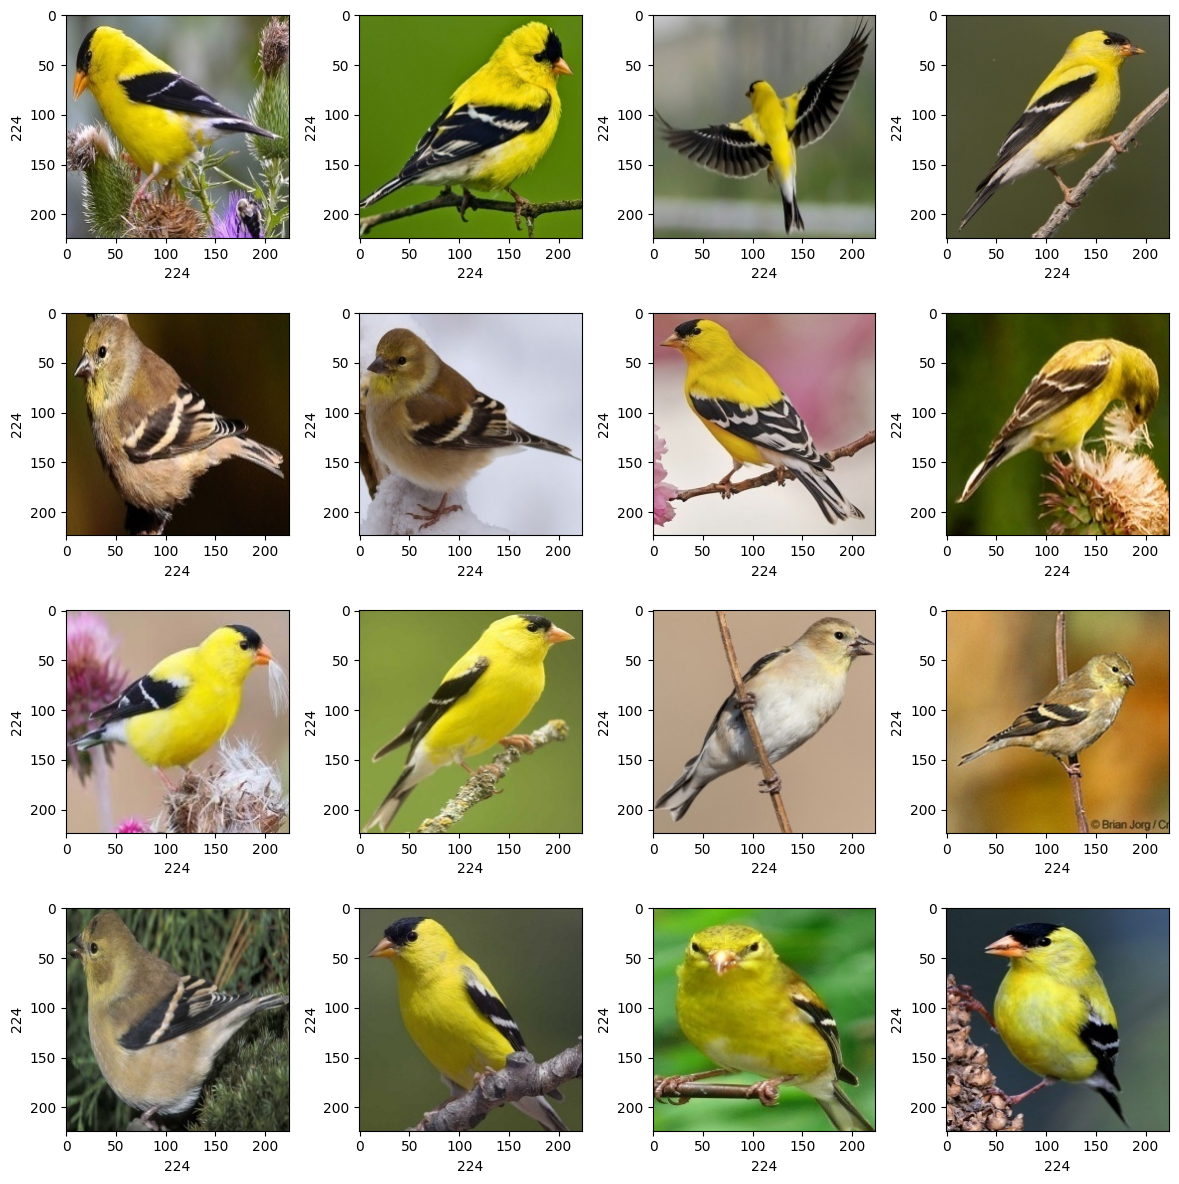

In [5]:
#images
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Data science/project12/Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [6]:
#Setting path
dir = "/content/drive/MyDrive/Data science/project12/Data/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [7]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [8]:
#Visualize
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
AMERICAN GOLDFINCH,143
EMPEROR PENGUIN,139
DOWNY WOODPECKER,137
FLAMINGO,132
CARMINE BEE-EATER,131
BARN OWL,129


In [9]:
#num classes
num_classes = len(label_counts)
num_classes

6

In [10]:
image_list[0].shape

(224, 224, 3)

In [11]:
label_list = np.array(label_list)
label_list.shape

(811,)

In [12]:
#Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [13]:
#Normalize
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

In [14]:
#Labeling
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [16]:
#Model cnn
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [18]:
#Train
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1839 - loss: 1.8154 - val_accuracy: 0.2308 - val_loss: 1.7711
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.2264 - loss: 1.7591 - val_accuracy: 0.3769 - val_loss: 1.7314
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.4234 - loss: 1.6930 - val_accuracy: 0.3000 - val_loss: 1.6516
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4235 - loss: 1.5994 - val_accuracy: 0.5077 - val_loss: 1.5730
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6022 - loss: 1.4792 - val_accuracy: 0.5308 - val_loss: 1.5017
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6368 - loss: 1.3695 - val_accuracy: 0.4769 - val_loss: 1.4794
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5565 - loss: 1.2790 - val_accuracy: 0.5308 - val_loss: 1.4172
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6623 - loss: 1.1755 - val_accuracy: 0.5846 - val_loss: 1.2

In [19]:
#Save
model.save("/content/drive/MyDrive/Data science/project12/bird_species.h5")

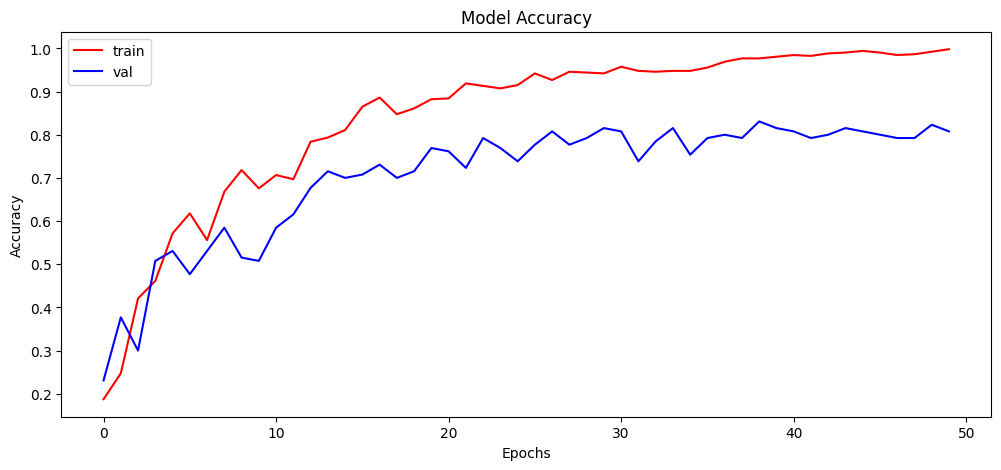

In [20]:
#Plot
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

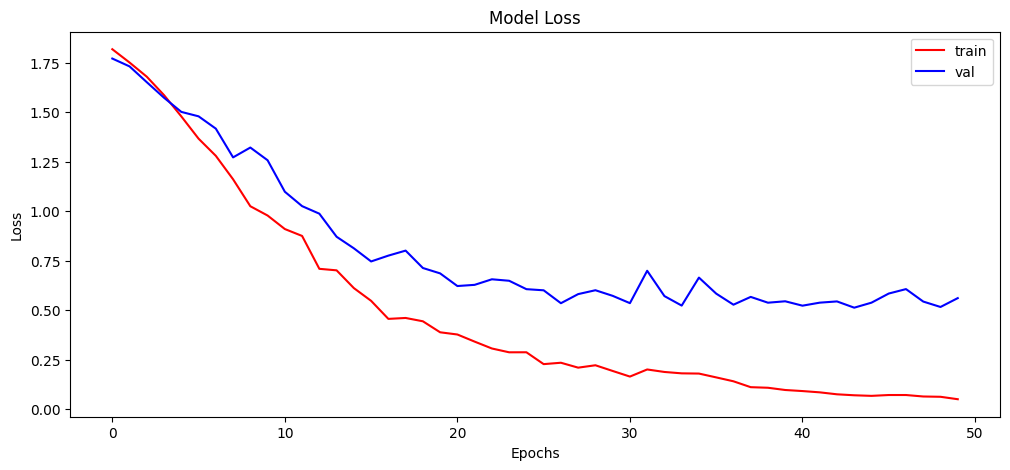

In [21]:
#Plot loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [22]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9198 - loss: 0.2422
Test Accuracy: 91.41104221343994


In [23]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


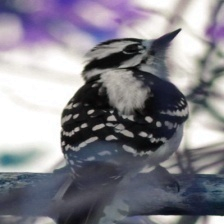

In [24]:
img = array_to_img(x_test[5])
img

In [25]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  DOWNY WOODPECKER
Predicted :  DOWNY WOODPECKER
